# Assignment 8
Using any dataset that has a categorical feature that needs to be predicted, use several algorithms, preprocessing techniques, feature extraction techniques to fit the data to the model and show the accuracy, confusion matrix, and the classification report. G
https://www.kaggle.com/ntnu-testimon/paysim1
https://www.kaggle.com/joniarroba/noshowappointments
https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
# numpy & pandas
import numpy as np
import pandas as pd


# make pretty plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# import sklearn modules

# sklearn models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression as Model

# sklearn metrics
from sklearn.metrics import (accuracy_score,classification_report,
                            confusion_matrix,auc,roc_curve
                            )
from sklearn import cross_validation

# sklearn preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
mushrooms = pd.read_csv('../data/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Understanding/Exploration

In [3]:
mushrooms.shape
# list(mushrooms.columns)
# len(mushrooms.columns)

(8124, 23)

In [4]:
# e: edible, p: poisonous
mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

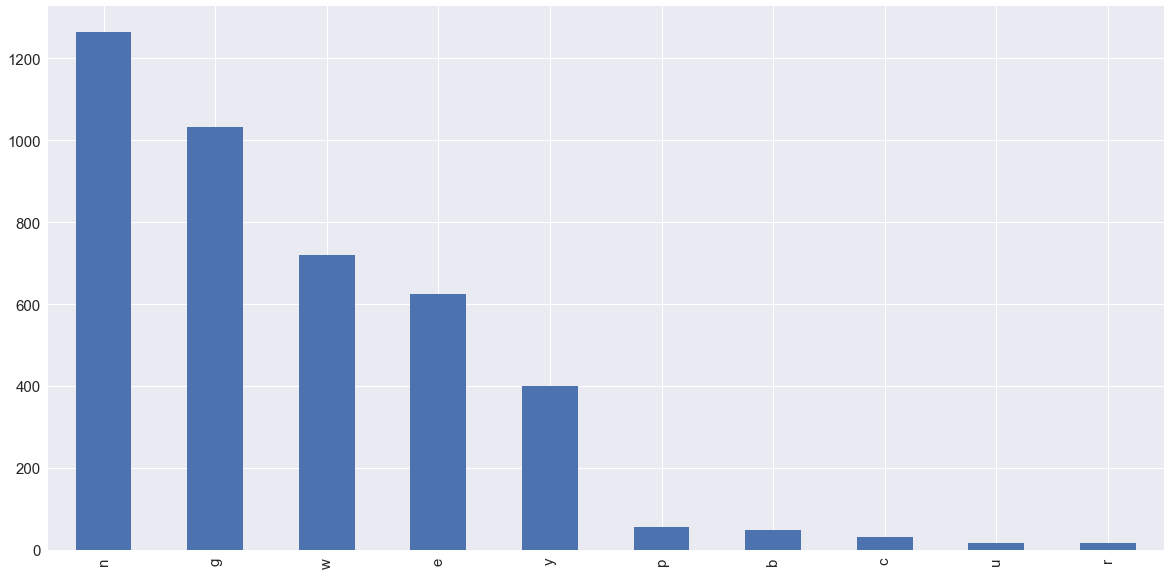

In [5]:
# counts - edible

# subset
df = mushrooms[mushrooms['class']=='e']
# value counts
df['cap-color'].value_counts().plot(kind='bar')

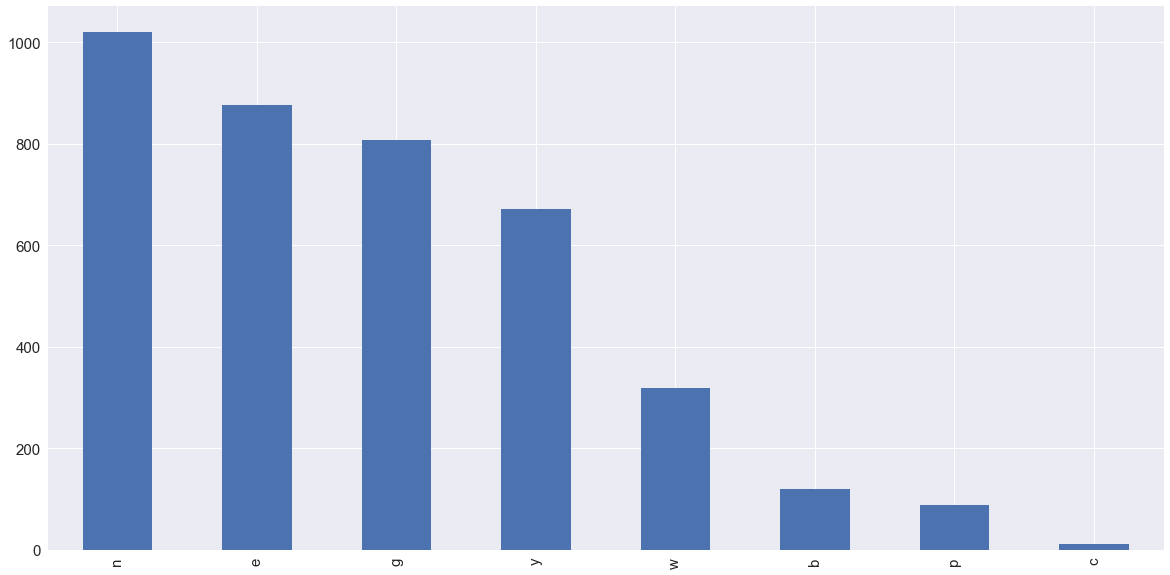

In [6]:
# counts - poisonous

# subset
df = mushrooms[mushrooms['class']=='p']
# value counts
df['cap-color'].value_counts().plot(kind='bar')

In [7]:
classes = ['p','e']
classes

['p', 'e']

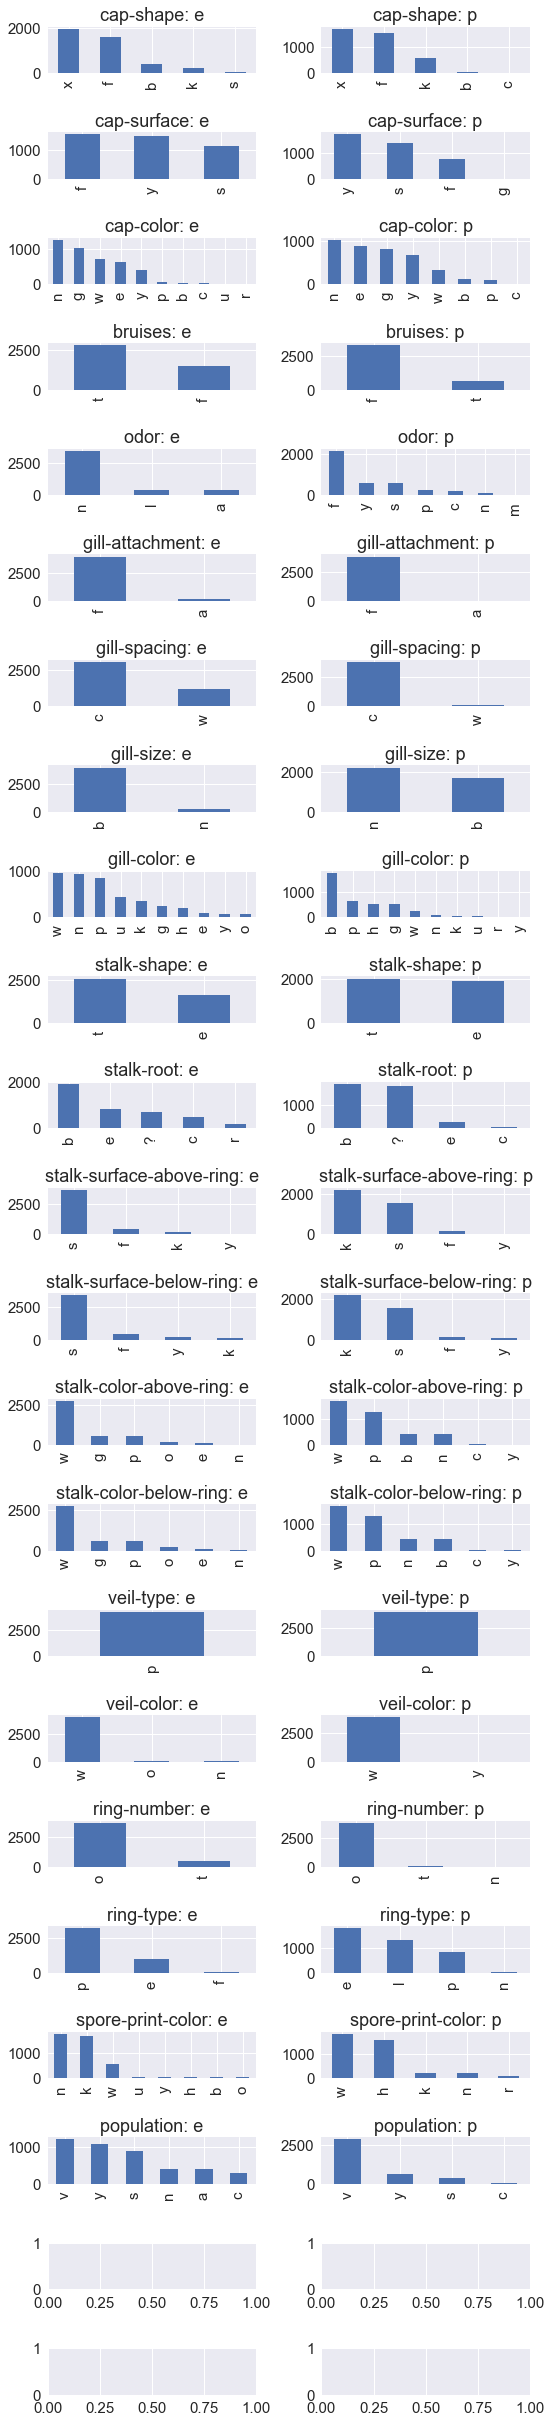

In [8]:
# Compare e vs. p value distributions

fig, axes = plt.subplots(23, 2, figsize=(8,34))

feat_cols = list(mushrooms.columns)
feat_cols = feat_cols[1:22]
feat_cols = np.asarray(feat_cols)

for col,(ax1,ax2) in zip(feat_cols,axes):
    
    df2 = mushrooms[mushrooms['class']=='e']
    df2[col].value_counts().plot(kind='bar', ax=ax1)

    df = mushrooms[mushrooms['class']=='p']
    df[col].value_counts().plot(kind='bar', ax=ax2)

    ax1.set_title('{}:'.format(col) + ' e')
    ax2.set_title('{}:'.format(col) + ' p')
plt.tight_layout()

# columns = mushrooms.columns[(mushrooms.columns != 'class')]
# fig, axes = plt.subplots(len(columns), 2, 
#                          figsize=(8,34))

# for column, subax in zip(columns, axes):
#     for ax, (isedible,g) in zip(subax, mushrooms.groupby('class')):
#         ax.set_title('{}: {}'.format(column, isedible))
#         g[column].value_counts().plot(kind='bar', ax=ax, alpha=0.5, )
# plt.tight_layout()

### A couple of observations can be made from these charts. There are clearly similarities and differences between edible and poisonous mushrooms. Edible mushrooms appear to have more bruises whereas poisonous have fewer. Edible mushrooms predominantly have no odor whereas poisonous mushrooms predominantly emit a foul odor. Gill attachment appears to be about the same, as well as gill spacing. Gill size appears to take both broad and narrow shapes for poisonous mushrooms whereas gill-size is primarily broad in edible mushrooms. Poisonous mushrooms gills are also colored primarily buff whereas edible mushroom gills are colored white, brown, and pink.

### Veil-type and veil-color, and ring number appear about the same and may not contribute as much information to the model. Will probably omit veil-type since there is only one attribute.

In [9]:
mushrooms['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [10]:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [11]:
# columns = mushrooms.columns[(mushrooms.columns != 'class')]
# fig, axes = plt.subplots(len(columns), 2, 
#                          figsize=(8,34))

# for column, subax in zip(columns, axes):
#     for ax, (isedible,g) in zip(subax, mushrooms.groupby('class')):
#         ax.set_title('{}: {}'.format(column, isedible))
#         g[column].value_counts().plot(kind='bar', ax=ax, alpha=0.5, )
# plt.tight_layout()

## Pre-processing: Label Encoding & Fit Transform

In [12]:
label_encoder = LabelEncoder

In [13]:
mushrooms_num = mushrooms.apply(LabelEncoder().fit_transform)
mushrooms_num.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
# No null/missing values
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [15]:
features = mushrooms_num.columns
list(features)[:5]

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises']

In [16]:
mushrooms_num.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Apply logistic regression model

In [17]:
# create variables
feat_cols = list(mushrooms_num.columns)
# len(feat_cols)
feat_cols = feat_cols[1:22]

feat_cols.remove('veil-type')
feat_cols

X = mushrooms_num[feat_cols]
y = mushrooms_num['class']

In [18]:
# Cross-validation set
X_train, X_test, y_train, y_test = cross_validation.train_test_split(scale(X), y,test_size=0.1, random_state=0)

X_train.shape

(7311, 20)

In [19]:
# logistic model
model = Model()
model.fit(X_test, y_test)
pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.94833948339483398

In [20]:
confusion_matrix(y_test, pred)

array([[408,  16],
       [ 26, 363]])

In [21]:
report = classification_report(y_test, pred)

In [22]:
print(report)

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       424
          1       0.96      0.93      0.95       389

avg / total       0.95      0.95      0.95       813



### Excellent accuracy score and classification report (for anything that doesn't involve life/death). Probably too good. Possibly overfit.

### The issue here is even with one false negative, someone would end up consuming a poisonous mushroom. 

## Applying linear, rbf, poly, and sigmoid models

In [23]:
from sklearn import svm, preprocessing
from sklearn.preprocessing import scale

In [24]:
# create variables
feat_cols = list(mushrooms_num.columns)
# len(feat_cols)
feat_cols = feat_cols[1:22]

feat_cols.remove('veil-type')
feat_cols

X = mushrooms_num[feat_cols]
y = mushrooms_num['class']

In [25]:
# Cross-validation set
X_train, X_test, y_train, y_test = cross_validation.train_test_split(scale(X), y,test_size=0.1, random_state=0)

y_test.shape

(813,)

In [26]:
X.shape

(8124, 20)

In [40]:
C=1.0
# X_scaled = preprocessing.scale(X)

svc = svm.SVC(kernel='linear', C=1.0).fit(X_train, y_train)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)

poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_train, y_train)

sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_train, y_train)

kernels = [svc, rbf_svc, poly_svc, sig_svc]
confusion_dicts = []
reports = []
accuracies = []

for kernel in kernels:

    
#     predicted values
    z = kernel.predict(X_test)
# #     compared predicted values with actual values
    tp = sum((y_test == True) & (z == True))
    tn = sum((y_test == False) & (z == False))
    fp = sum((y_test == False) & (z == True))
    fn = sum((y_test == True) & (z == False))
# #     create dictionary
    confusion_dict = {'kernel': kernel.kernel,'false positives': fp, 'false negatives': fn, 'true negatives': tn, 'true positives': tp,}
#     print(confusion_dict)
    report = classification_report(y_test, z)
    reports.append(report)
    confusion_dicts.append(confusion_dict)
#     print(confusion_dicts)
#     print(reports)
    accuracy = accuracy_score(y_test, z)
    accuracies.append(accuracy)
    print(accuracies)

#     print(z.shape, y_test.shape)

[0.991389913899139]
[0.991389913899139, 1.0]
[0.991389913899139, 1.0, 1.0]
[0.991389913899139, 1.0, 1.0, 0.77613776137761381]


### Excellent accuracy reports for the first three models. The sigmoid kernel produced a much lower accuracy. The accuracies are really so high, there is concern for overfitting. 

In [41]:
confusion_matrices = pd.DataFrame(confusion_dicts)

In [42]:
confusion_matrices

,false negatives,false positives,kernel,true negatives,true positives
0,2,5,linear,419,387
1,0,0,rbf,424,389
2,0,0,poly,424,389
3,95,87,sigmoid,337,294


In [43]:
list(reports)

['             precision    recall  f1-score   support\n\n          0       1.00      0.99      0.99       424\n          1       0.99      0.99      0.99       389\n\navg / total       0.99      0.99      0.99       813\n',
 '             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       424\n          1       1.00      1.00      1.00       389\n\navg / total       1.00      1.00      1.00       813\n',
 '             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       424\n          1       1.00      1.00      1.00       389\n\navg / total       1.00      1.00      1.00       813\n',
 '             precision    recall  f1-score   support\n\n          0       0.78      0.79      0.79       424\n          1       0.77      0.76      0.76       389\n\navg / total       0.78      0.78      0.78       813\n']

In [44]:
reports = pd.DataFrame(reports)

In [45]:
reports

,0
0,precision recall f1-score s...
1,precision recall f1-score s...
2,precision recall f1-score s...
3,precision recall f1-score s...


### The classification reports don't seem to play nicely with pandas dataframes. Probably because it's more like a list than a dictionary and has repeating column names. Haven't been able to figure out how to fix it yet. 

### All the same, as you can see from the prediction classification reports using linear, rbf, and poly kernels of SVM produce excellent precision, better than logistic regression. Both rbf and poly kernels did not produce either false positives or false negatives. These models may be overfit to the data, but I'd be much more comfortable with these odds, considering that we are looking to identify poisonous mushrooms from edible mushrooms.